### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import re
import string
import nltk
%matplotlib inline

In [2]:
#Get the data
temp = pd.read_csv('7817_1.csv')
temp.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


### Getting the relevant fields for analysis

In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
id                      1597 non-null object
asins                   1597 non-null object
brand                   1597 non-null object
categories              1597 non-null object
colors                  774 non-null object
dateAdded               1597 non-null object
dateUpdated             1597 non-null object
dimension               565 non-null object
ean                     898 non-null float64
keys                    1597 non-null object
manufacturer            965 non-null object
manufacturerNumber      902 non-null object
name                    1597 non-null object
prices                  1597 non-null object
reviews.date            1217 non-null object
reviews.doRecommend     539 non-null object
reviews.numHelpful      900 non-null float64
reviews.rating          1177 non-null float64
reviews.sourceURLs      1597 non-null object
reviews.text            1597 non-null obje

In [4]:
permanent = temp[['reviews.rating','reviews.text','reviews.title','reviews.username']]
print(permanent.isnull().any())

reviews.rating       True
reviews.text        False
reviews.title        True
reviews.username     True
dtype: bool


### From the previous results we can see that except reviews.text, every attribute has null values

In [5]:
permanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic


### Handling Null Values

In [6]:
permanent['reviews.rating'].isnull().value_counts()

False    1177
True      420
Name: reviews.rating, dtype: int64

In [7]:
#more then 1/3rd of the data has no ratings
420/1177

0.356839422259983

In [8]:
check =  permanent[permanent["reviews.rating"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
5,NaN,"My previous kindle was a DX, this is my second...",Great device for reading. 8 people found this ...,Kelvin Law
6,NaN,Allow me to preface this with a little history...,One Simply Could Not Ask For More 28 people fo...,Ricky
7,NaN,Just got mine right now. Looks the same as the...,Definitely better than the previous generation...,Bandler
8,NaN,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets! 16 people found...",Cristina M
9,NaN,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader 19 ...,Tedd Gardiner


### getting only the nul values

In [9]:
senti= permanent[permanent["reviews.rating"].notnull()]
permanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic


In [10]:
senti['reviews.rating'].value_counts()

5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: reviews.rating, dtype: int64

### As we can see that we only have integer values for rating, so we will classify as per the rating

### Classifying text as positive and negative (Positive: 4 & 5, Negative: 1 to 3)

In [11]:
senti["senti"] = senti["reviews.rating"]>3
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Review Counts

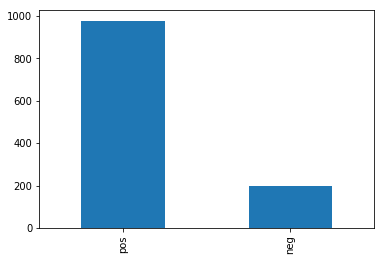

In [12]:
senti["senti"].value_counts().plot.bar()

### Preprocessing/Cleaning text

In [13]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

In [14]:
cleanup_re = re.compile('[^a-z]+')

In [15]:
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence

In [16]:
senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
check["Summary_Clean"] = check["reviews.text"].apply(cleanup)

C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Splitting Train and Test Data

In [17]:
split = senti[["Summary_Clean" , "senti"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

### Feature Extractor for NLTK Naive bayes classifier

In [18]:
def word_feats(words):
    features = {}
    for word in words:
        features[word] = True
    return features

In [19]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] =check["Summary_Clean"].str.lower().str.split()

C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])
prediction =  {}

train_naive = []
test_naive = []
check_naive = []

In [21]:
for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]



### NaiveBayesClassifier

In [22]:
classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy :{}".format(nltk.classify.util.accuracy(classifier,test_naive)))
classifier.show_most_informative_features(5)

NLTK Naive bayes Accuracy :0.7404255319148936
Most Informative Features
                  mainly = True              neg : pos    =    103.8 : 1.0
                  secure = True              neg : pos    =     97.4 : 1.0
               represent = True              neg : pos    =     97.4 : 1.0
                    stay = True              neg : pos    =     64.2 : 1.0
                  common = True              neg : pos    =     60.4 : 1.0


In [23]:
y = []
only_words = [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i])]
prediction["Naive"] = np.asarray(y)

y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i])]
    
check["Naive"] = y1

C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Bulding Countvector and Tfidf vector for train , test ,check data

In [25]:
from wordcloud import STOPWORDS

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
stopwords.remove("not")

In [27]:
count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,3))
tfidf_transformer = TfidfTransformer()

In [28]:
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [29]:
X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

In [30]:
checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)

### Fitting Multinomial NB

In [31]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf, train['senti'])
prediction['Multinomial'] = model1.predict(X_test_tfidf)
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf, test["senti"])))
check["multi"] = model1.predict(checktfidf)

Multinomial Accuracy : 0.8723404255319149


C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Fitting Bernouli NB

In [34]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
prediction['Bernoulli'] = model2.predict(X_test_tfidf)
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf,test["senti"])))
check["Bill"] = model2.predict(checktfidf)

Bernoulli Accuracy : 0.8808510638297873


C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Logistic Regression

In [38]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver = 'lbfgs',C=10000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict(X_test_tfidf)
print("Logistic Regression Accuracy:{}".format(logreg.score(X_test_tfidf,test["senti"])))
check["log"] = logreg.predict(checktfidf)

Logistic Regression Accuracy:0.9063829787234042


C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
